In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
import sklearn.datasets

In [5]:
data = sklearn.datasets.load_boston()

We build a linear model $\beta_0 + X\beta = y$. We want to minimize the squared error (+ ridge regulator): $$||y-X\beta||^2 + \lambda||\beta||^2.$$
Thus we differentiate w.r.t. $\beta$ and set equal $0$. $$-2(y-X\beta)^T \cdot X + 2 \lambda \beta = 0$$  
$$-X^T y+X^T X \beta + \lambda \beta = 0$$  
$$\beta = (X^T X + \lambda I)^{-1} (X^T y)$$

In [260]:
def linear_regression(data, target, l=0):
    if len(data.shape) > 1:
        i = np.eye(data.shape[1])
    else:
        i = 1    
    return np.linalg.inv(data.T @ data + l * i) @ data.T @ target

In [278]:
data, target = sklearn.datasets.make_regression(n_samples=100, n_features=1, noise=.5)

In [279]:
b = linear_regression(data, target, l=0)
b.shape

(1,)

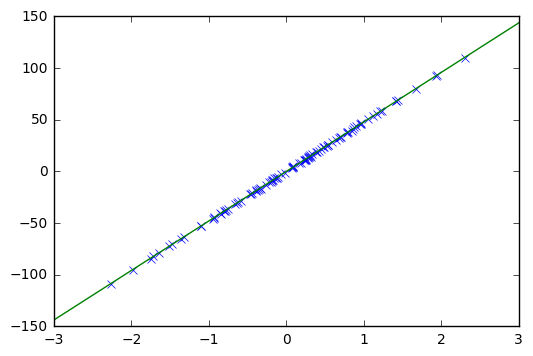

In [280]:
plt.plot(data, target, 'x')
plt.plot(np.linspace(-3,3,1000), b.reshape(1)*np.linspace(-3,3,1000))

In [281]:
data = (np.random.random(100)*6 - 3)
target = np.sin(data) + np.random.randn(data.shape[0]) * 0.2
data = data.reshape(100, 1)

In [282]:
data.T @ target

array([ 103.08177041])

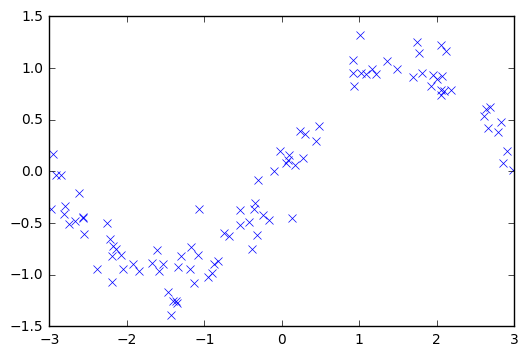

In [283]:
plt.plot(data, target, 'x')

In [284]:
b = linear_regression(data, target)

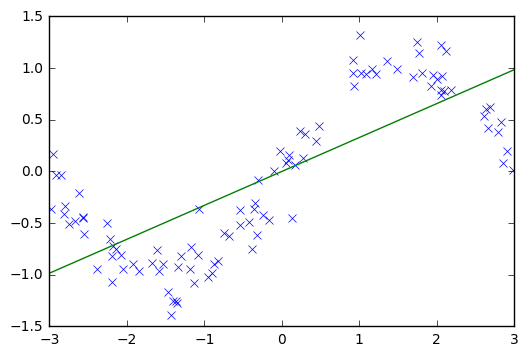

In [285]:
plt.plot(data, target, 'x')
plt.plot(np.linspace(-3,3,1000), b*np.linspace(-3,3,1000))

The data is not linear in the input space, but maybe in some features. Lets try cubic ones.

In [286]:
def cubic_features(data):
    d = data.T
    return np.array([d, d*d, d*d*d]).reshape(d.shape[0]*3, d.shape[1]).T

In [289]:
b = linear_regression(cubic_features(data), target, l=10)

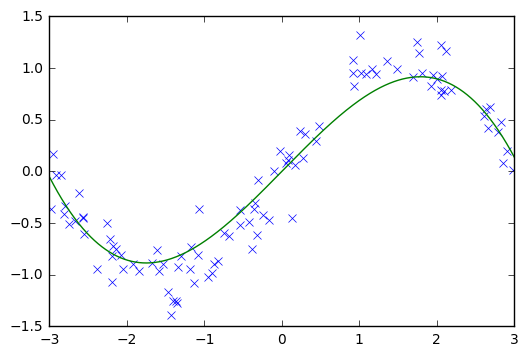

In [290]:
plt.plot(data, target, 'x')
plt.plot(np.linspace(-3,3,1000), b @ cubic_features(np.linspace(-3, 3, 1000).reshape(1000, 1)).T)

In [171]:
a = np.array([[1,2,4]]).T

In [172]:
a.T@a

array([[21]])